<a href="https://colab.research.google.com/github/Sarath-Mohan9469545/computing_lab_exp/blob/main/lda_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
df=pd.read_csv("/content/predictive_maintenance.csv")
print(df)

        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0    

In [52]:
x=df[["Type",  "Air temperature [K]",  "Process temperature [K]","Rotational speed [rpm]",  "Torque [Nm]",  "Tool wear [min]"]]
y=df["Failure Type"]
x

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14
9996,H,298.9,308.4,1632,31.8,17
9997,M,299.0,308.6,1645,33.4,22
9998,H,299.0,308.7,1408,48.5,25


In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [55]:
x["Type"]=le.fit_transform(x["Type"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
x

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,0,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,0,299.0,308.7,1408,48.5,25


In [57]:
clf = LinearDiscriminantAnalysis(n_components=2)
clf=clf.fit_transform(x, y)

In [58]:
clf

array([[-0.59219018,  1.07908454],
       [ 0.32760361,  0.36100515],
       [-1.46008365,  0.6099751 ],
       ...,
       [ 0.31475395,  0.83823223],
       [-0.25155529, -0.39816351],
       [ 0.5051908 ,  0.25341243]])

In [59]:
y

0       No Failure
1       No Failure
2       No Failure
3       No Failure
4       No Failure
           ...    
9995    No Failure
9996    No Failure
9997    No Failure
9998    No Failure
9999    No Failure
Name: Failure Type, Length: 10000, dtype: object

In [60]:
new_df=pd.DataFrame(clf,columns=["LDA1","LDA2"])

In [61]:
new_df

,LDA1,LDA2
0,-0.592190,1.079085
1,0.327604,0.361005
2,-1.460084,0.609975
3,1.552056,0.431402
4,1.741985,0.379671
...,...,...
9995,1.697478,0.768089
9996,0.843404,0.510485
9997,0.314754,0.838232
9998,-0.251555,-0.398164


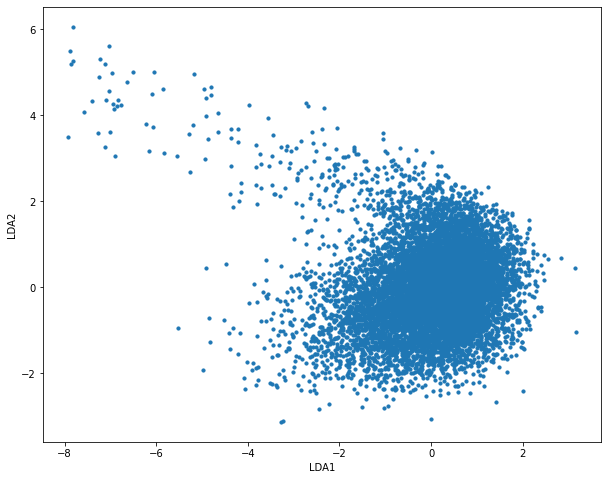

In [62]:
import matplotlib.pyplot as plt
x_axis=new_df["LDA1"]
y_axis=new_df["LDA2"]
plt.scatter(x_axis,y_axis,s=10, cmap="y")
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.rcParams["figure.figsize"]=(10,8)
plt.show()

In [51]:
from sklearn.cluster import KMeans

In [63]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(new_df)

In [64]:
c=kmeans.cluster_centers_

In [65]:
c

array([[ 0.34821719, -0.74116914],
       [ 0.96648613,  0.54756051],
       [-3.91611858,  3.1490905 ],
       [-0.27908608,  0.92969571],
       [-1.42685749, -0.84531927]])

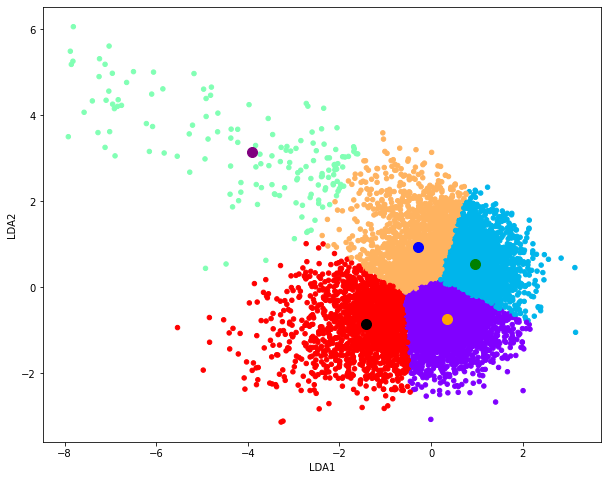

In [69]:
import matplotlib.pyplot as plt
x_axis=new_df["LDA1"]
y_axis=new_df["LDA2"]
labels=kmeans.labels_
plt.scatter(x_axis,y_axis, s=20,c=labels,cmap="rainbow")
plt.scatter(c[0][0],c[0][1],s=100,color="orange")
plt.scatter(c[1][0],c[1][1],s=100,color="green")
plt.scatter(c[2][0],c[2][1],s=100,color="purple")
plt.scatter(c[3][0],c[3][1],s=100,color="blue")
plt.scatter(c[4][0],c[4][1],s=100,color="black")
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.show()